In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('D:\ML\data\data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=df.drop(['User ID','Gender'],axis=1)

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [95]:
#X = pd.series(df.iloc[:,0:2].values)
X=df[['Age','EstimatedSalary']]
Y=df[['Purchased']]

In [106]:
type(X)

pandas.core.frame.DataFrame

In [107]:
type(Y)

pandas.core.frame.DataFrame

In [108]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [97]:
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=10)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
classifier=LogisticRegression(random_state=10)

In [102]:
classifier.fit(X_train,y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=10)

In [103]:
y_pred = classifier.predict(X_test)

In [104]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy=accuracy_score(y_test,y_pred)

In [94]:
accuracy

0.69

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
c_m=confusion_matrix(y_test,y_pred)

In [63]:
c_m

array([[69,  0],
       [31,  0]], dtype=int64)

In [64]:
from sklearn.metrics import r2_score

Text(0.5, 36.72222222222221, 'Predicted Values')

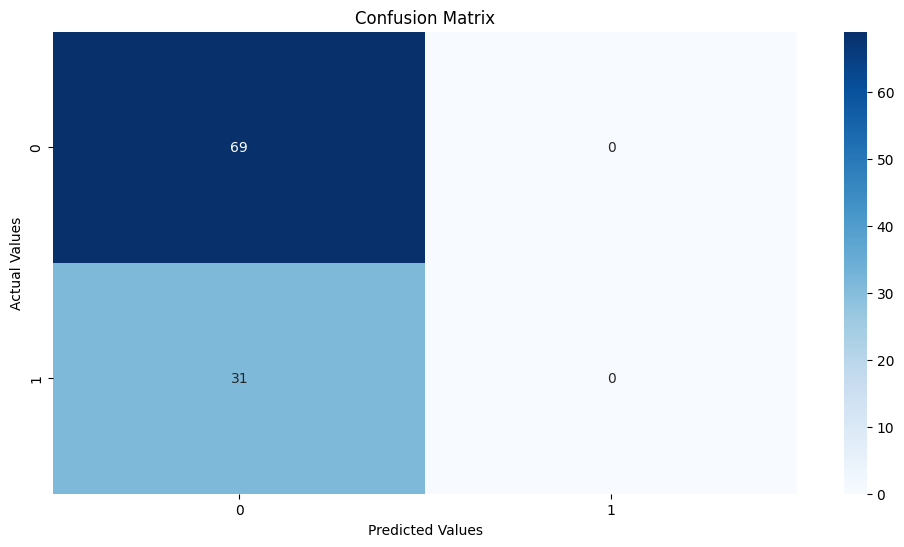

In [65]:
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(c_m,annot=True,fmt='d',cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        69
           1       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [102]:
r2 = r2_score(y_test,y_pred)
a_r2=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

In [103]:
a_r2

0.5301366136627793

## with standard scaler

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [78]:
scaler.fit(X_train)

StandardScaler()

In [79]:
X_train=scaler.fit_transform(X_train)

In [80]:
X_test = scaler.transform(X_test)

In [81]:
classifier.fit(X_train,y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=10)

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy=accuracy_score(y_test,y_pred)

In [89]:
accuracy

0.9

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
c_m=confusion_matrix(y_test,y_pred)

In [92]:
c_m

array([[64,  5],
       [ 5, 26]], dtype=int64)

Text(0.5, -7.277777777777782, 'Predicted Values')

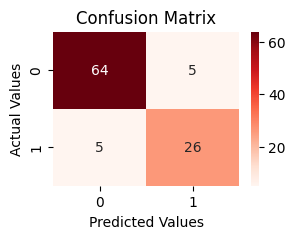

In [107]:
plt.figure(figsize=(3,2))
plt.title('Confusion Matrix')
sns.heatmap(c_m,annot=True,fmt='d',cmap='Reds')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.84      0.84      0.84        31

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



In [105]:
r2 = r2_score(y_test,y_pred)
a_r2=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

In [106]:
a_r2

0.5301366136627793